In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

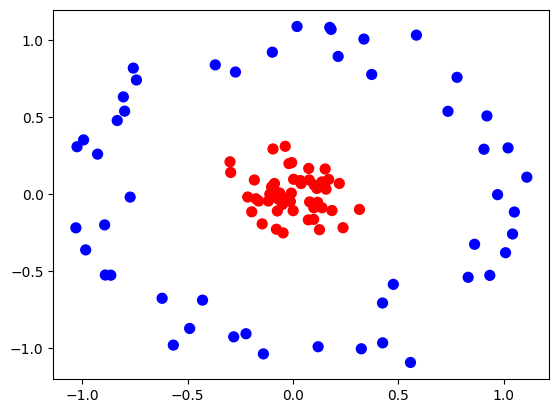

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

# Applying linear SVM first

In [4]:
X_train, X_test, y_train, y_test  =train_test_split(X,y,test_size=0.20)

In [7]:
clf = SVC(kernel="linear")
clf.fit(X_train,y_train.ravel())
y_pred = clf.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.65

In [9]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9452\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


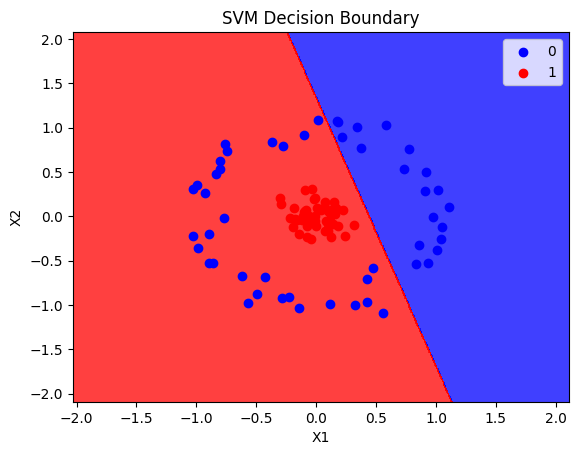

In [11]:
plot_decision_boundary(X, y, clf)

# Let's tranform 2d data into 3d

In [13]:
def plot_3d_plot(X,y):
    r = np.exp(-(X**2).sum(1))
    ax = plt.subplot(projection= '3d')
    ax.scatter3D(X[:,0],X[:,1],r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

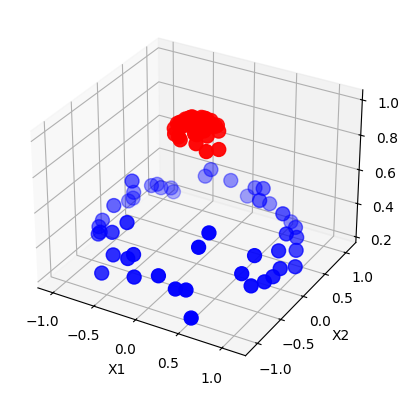

In [14]:
plot_3d_plot(X,y)

# For every point, I calculated 'r' for it and plotted it in a 3d scatter plot. Now you can easily classify using a plane. The function used to transform the 2d into 3d using 'r' is called Radial basis function which is y=e^(-x)^2

# Now using RBF kernel 

In [17]:
clf2 = SVC(kernel = 'rbf')
clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)

In [18]:
accuracy_score(y_test,y_pred)

1.0

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9452\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


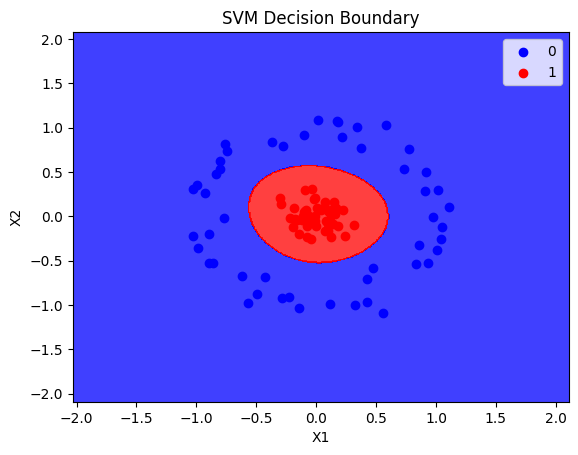

In [19]:
plot_decision_boundary(X,y, clf2)

In [20]:
# Using polynomial kernel

In [21]:
clf3 = SVC(kernel = 'poly')
clf3.fit(X_train,y_train)
y_pred = clf3.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred)

0.6

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9452\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


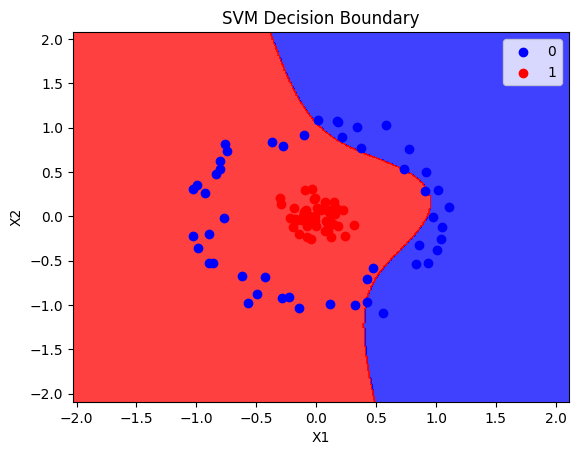

In [23]:
plot_decision_boundary(X,y,clf3)

# you can change 'degree' parameter for polynomial kernel in SVM